# Workshop 2: Intro to Machine Learning with SciKit-Learn

## Importing Libraries and Loading the Data


In [0]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [0]:
# imports our data into Colab
from google.colab import files
uploaded = files.upload()


Saving adult.csv to adult.csv


In [0]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Preprocessing and Visualization

In [0]:
# Domain of values in workclass column
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


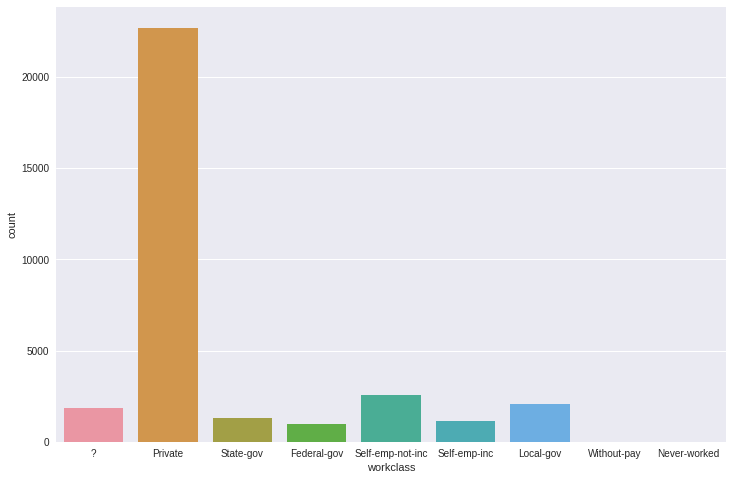

In [0]:
# Distribution of workclass
figure = plt.figure(figsize=(12, 8))
sns.countplot(x='workclass', data=df)

In [0]:
# Domain of values in workclass column
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


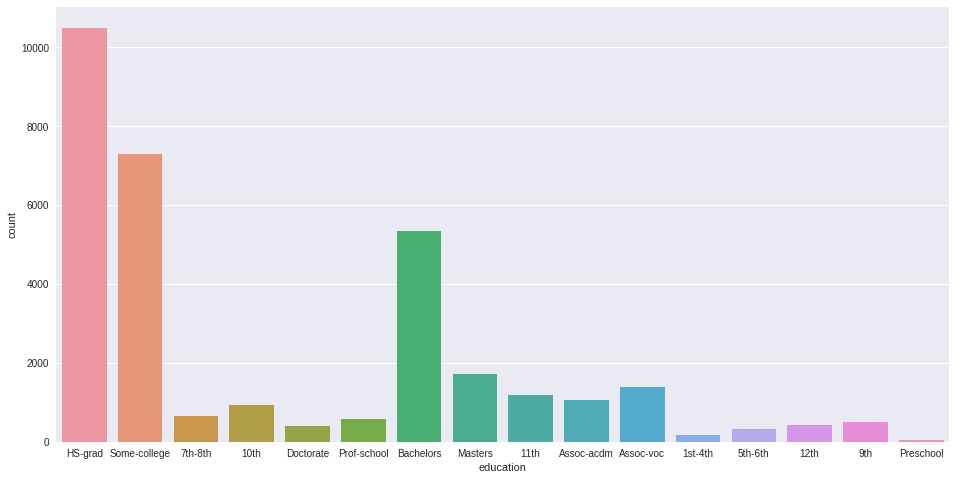

In [0]:
# Distribution of education
figure = plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


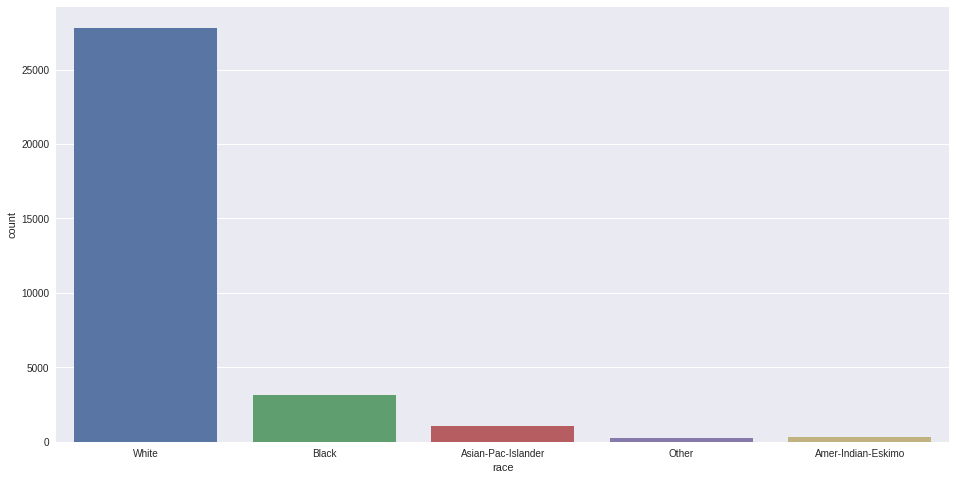

In [0]:
# Distribution of race
figure = plt.figure(figsize=(16, 8))
sns.countplot(x='race', data=df)

### Label Encoding Columns

#### Simple Label Encoding - Encoding the Sex Column

In [0]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

label_encoders = defaultdict()

lbl = LabelEncoder()

In [0]:
df['sex'] = lbl.fit_transform(df['sex'])
df['sex'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: sex, dtype: int64

In [0]:
label_encoders['sex'] = lbl

In [0]:
# Compare number of participants for each education rank
df[['education', 'education.num']]

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


In [0]:
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

In [0]:
for num in range(1, 17):
  print(num, df[df['education.num'] == num]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [0]:

df.drop(['education'], axis=1, inplace=True)

In [0]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
2,66,?,186061,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K


#### One-Hot Encoding

In [0]:
df.select_dtypes(include='object').columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'native.country', 'income'],
      dtype='object')

In [0]:
one_hot_encode_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
df = pd.get_dummies(df, columns=one_hot_encode_cols)
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data Into Features and Targets 

In [0]:
X = df.drop(['income'], axis=1)
y = df['income']

### Splitting the Data Into Training and Testing Sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## K-Nearest Neighbors

Different classes generated by the KNN
---
---
**How it works**
* Determines test point class by seeing surrouding "K" data points
---
**Pros**
* Easy to understand
* Gets decent results for simple model
* Used for regression btw
---
**Cons**
* So many computations...
* Also holds training data during testing phase



![alt text](http://67.205.151.206/web_assets/knn.png "Sigmoid Function")



In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7808373426143924
              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.87      7429
        >50K       0.59      0.27      0.37      2340

   micro avg       0.78      0.78      0.78      9769
   macro avg       0.70      0.61      0.62      9769
weighted avg       0.75      0.78      0.75      9769



In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=7))])
knn_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'))])

In [0]:
y_pred = knn_pipeline.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy:  0.8307912785341386
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7429
        >50K       0.68      0.56      0.61      2340

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



## Decision Trees

Conceptual Background
---
---
**What is a Decision Tree?**
* A graphical representation of possible solutions to a decision (based on certain conditions).
* It starts with the root and branches off into a number of leaves.
* A systematic process with a visual representation.


---
**Parts of a Decision Tree**
* Each node represents a feature or attribute.
* Each branch represents a decision or rule.
* Each leaf represents an outcome.


---

**Algorithms and Approaches to help build a Decision Tree?**
* Classification and Regression Trees (CART algorithm)
* Iterative Dichotomiser 3 (using entropy and information gain)
* For this workshop, we will be using the Decision Tree Classifier provided by SciKit-Learn.

---

**Process**
* Determine the root node. We pick the attribute that best classifies the training data.
* Top-down process
* Which attribute to choose? The one with the higest information gain.
* Information gain is defined using a measure called "entropy".
* 𝐻(𝑋)=−∑𝑛𝑖=1𝑃(𝑥𝑖)log2𝑃(𝑥𝑖)

---

**Advantages of applying Decision Trees**
* Easy usability and comprehension
* Incredibly transparent and robust


![alt text](https://www.researchgate.net/profile/Avashlin_Moodley/publication/311614501/figure/fig2/AS:439104304357377@1481702033140/An-example-of-a-simple-decision-tree.png)

In [0]:
from sklearn.tree import DecisionTreeClassifier # imports the Decision Tree Classifier

# We have already imported other libraries and loaded our data
# We splitted our data into feature and target variables, as well as into training and test sets.

# Now, we build the model.
dtree = DecisionTreeClassifier() # creates Decision Tree classifier object
dtree.fit(X_train, y_train) # Trains Decision Tree classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# Prediction of test dataset and evaluation of the model
y_pred = dtree.predict(X_test) 

# Model Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8170744190807657
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7429
        >50K       0.62      0.61      0.62      2340

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



## Logistic Regression

Theoretical Background
---
---
**Assumptions**


*   Our data can be split into 2 regions
*   This split is linear, meaning no curves or folds, etc.
*   Ex: In 2 dimensions, this split would be a line, and in 3 dimensions a plane
*   Generally, we want a (n - 1) dimensional plane to split n-dimensional space into 2 classes
*   We call this (n - 1) plane the linear discriminant, because 1) it's linear, 2) it discriminates between some class A and not A

---
**Goals**


*   Given a input point **x** predict the probability that **x** belongs to the data class **y** - denoted *P<sub>y</sub>(x)*
*   Ex: Given some characteristics about a person, whether they're above or below 130 pounds
*   **x** would be the characteristics, and the possible classes would be above & below 130 pounds

---

**Process**: 
*This may be a little confusing for some, please ask me questions*
* Let's simplify our model to 2 dimensions, so we're looking for a discriminator in 1 dimension
* Because our plane is linear, it can be represented by *bias* + *C<sub>0</sub>x*
* The issue is that this linear function also has range from (-$\infty$,$\infty$)
* We need to map this to **(0, 1)** to represent a probabilitiy
* We can do this by using the Sigmoid function, shown below
* D: (-$\infty$, $\infty$) -> R: **(0, 1)** - this allows us to turn outputs from the linear discriminant into probability  *P<sub>y</sub>(x)*

![alt text](https://cdn-images-1.medium.com/max/1600/1*Xu7B5y9gp0iL5ooBj7LtWw.png "Sigmoid Function")

Importing necessary modules & Parameters
---
---
**Pipeline**


*   Describes a pipeline *(what a surprise)* of data transforms ending with an estimator of some kind
*   In our example, StandardScaler is the only transform, and LogisticRegression is the estimator
*   Useful for any kind of preprocessing required before actual training

---
**StandardScaler** 
*   Transforms all data x -> (x - u) / s
*   "Standardize features by removing the mean and scaling to unit variance" - SkLearn Doc.
*   Works by centering the sample data to a mean of 0 and squishing the data proportional to its standard deviation
*   u (mu) is the mean of the sample data
*   s is the sample standard deviation of the sample data

---

**Logistic Regression**

1.   Let k be a value known as the regularization parameter
2.   Higher values of k more heavily "punish" increases in parameter values
3.   This is useful to prevent overfitting , as increasing values of k favor generalization rather than strong data fitting 
4.   Can be thought of as painting with wide strokes rather than with a thin paint brush
5.   C = 1/k, so C is just the inverse of k. Hence higher values of C punish parameter weights less heavily, favoring data fitting

---

**Fitting** 

*   Modern libraries allow us to abstract away all the computation.
*    **lr_pipeline.fit (** *X_train*, *y_train* **) ** starts the model's process of finding a pseudo-optimal parameter set.
*    Calling Decision trees work prettty similar to Neural Networks, through gradient descent followed by backpropogation to adjust parameters.
*    The model stores these weights, so we can call ***lr_pipeline.predict*** after training to test the model's predictive ability on data it hasn't yet seen.





In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=4.0))]) # pipeline with a scaling, then a logistic regression estimator
lr_pipeline.fit(X_train, y_train) # training the model with input data X_train and output y_train

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Model Accuracy Testing
---

**Predict**


*   Used to test the performance of trained models on data
*   **lr_pipeline_predict** returns a vector containing the model predictions for each entry in ***X_test***
*  **accuracy_score** is used to compare the predicted values ***y_pred*** against the ground truth ***y_test***
* **classification_report** is used to summarize the data the model prediction and reality



In [0]:
y_pred = lr_pipeline.predict(X_test) # getting the list of predictions with input X_test (data model hasn't seen)
print('Accuracy: ', accuracy_score(y_test, y_pred)) # getting accuracy of the predicted output vs. ground truth
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy:  0.8499334629951889
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7429
        >50K       0.73      0.59      0.65      2340

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



Effects of Adjusting the Learning Rate
---

This data isn't that large so the effects are difficult to observe without going to the extremes

Our prior estimator was `('lr', LogisticRegression(C=4.0))` with inverse learning rate 4.0. \

We can try a faster learning rate at `C=.000001` and slower rate at `C=1000000`. 



In [0]:
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=.000001))]) # Faster learning rate, prone to overfitting
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy:  0.7419387859555737
              precision    recall  f1-score   support

       <=50K       0.93      0.71      0.81      7429
        >50K       0.48      0.84      0.61      2340

   micro avg       0.74      0.74      0.74      9769
   macro avg       0.71      0.78      0.71      9769
weighted avg       0.83      0.74      0.76      9769



In [0]:
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=1000000))]) # Slower learning rate, no as prone to overfitting - recognizes broader trends
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy:  0.8500358276179752
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7429
        >50K       0.73      0.59      0.65      2340

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

